#### Data Science Technologies

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

*License: [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)*  

---

## 1. Supervised Learning

Supervised learning considers all the machine learning modeling when a target variable (or golden truth) is available. The aim is to train a dataset on a set of examples fitting to the target variable.  
+ Regression
    - Parametric: e.g. multiple linear regression
    - Non-parametric: e.g. K-nearest neightbor
+ Classification
    - Clasical: Logistic regression
    - Assemble: Random Forest, Neural Networks    

### 1.1. Parametric example

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:
A straight-plane fit is a model of the form

$$
\large y = \large \beta + \large \alpha_1 x_1 + \large \alpha_2 x_2 +...+ \large \alpha_n x_n
$$

where:
<br>$\alpha_i$ is commonly known as the *slope* in multiple dimensions that makes up a plane
<br>$\beta$ is commonly known as the *intercept*. 

Extending each sample with an intercept xi := [1, xi] ∈ RP+1 allows us to use a more general notation based on linear algebra and write it as a simple dot product:
y ( x i , β ) = x iT β ,

<img src="../img/reg3.png" width="300">
<img src="../img/reg5.png" width="400">

<img src="../img/reg6.png" width="900">

### 1.2. Non-Parametric example

- Nonparametric regression is a collection of techniques for fitting a curve when there is little a priori knowledge about its shape.
- The simplest nonparametric regression estimators are local versions of location estimators. For a random variable (x, y), the regression curve **μ(x) = E(y|x)**
- The model immediately adapts as we receive new training examples, but computational complexity grows lineary with the number of samples.
<img src="../img/reg11.png" width="700">

#### K-Nearest Neighbors

This method follows the intuition that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

---
### Code Dictionary

code | description
-----|------------
`test_train_split(Features, Target, percentage_of_test)` | Using the Scikit learn library, Split arrays or matrices into random train and test subsets
`.LinearRegression()` | Linear regression model
`.fit()` | computes the results of the scikit learn model object like LinearRegression.  Effectively, it solves for $y = \alpha x + \beta + e$
`.summary()` | returns the summary from the computed results from `.fit()`
`.predict()` | Computes the result of new input data without output for a fitted model.
`plt.plot()` | Plot a line graph of data.
`plt.scatter()` | Plot a scatterplot of data.
`read_csv(file)` | Using the Pandas library, create a dataframe for the dataset
`.loc()` | Access a group of rows and columns by label(s) or a boolean array.
`mean_squared_error` | Scikitlearn fuction to calculate the mean squared error
`r2_score` | Scikitlearn fuction to calculate the r2 score
`statsmodels` | Library for in depth statistical analysis.
`math` | Library for in mathematical operations.
`.OLS(y, X)` | Ordinary least squares aka linear regression.
`.RFECV(model, folds)` | Automatic selection of the best number of features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's take an already known dataset

The data itself is extracted from [Inside Airbnb](http://insideairbnb.com) where is possible to make a very nice visual analysis following the hypothesis: Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. However, data shows that the majority of Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities.

In [2]:
df = pd.read_csv('airbnb_amsterdam.csv')

In [3]:
df.head()

,Unnamed: 0,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1,156,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1,126,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
2,2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1,132,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592
3,3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1,121,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028
4,4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1,93,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873


#### What do we want to predict?
Seperate out the target variable and features

In [4]:
features = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms']

In [5]:
X = df[features]
y = df.price

In [6]:
y.mean()

164.8257194821868

Learning a multiple regression model
Recall we can use the following code to learn a multiple regression model predicting 'price' based on the following features: example_features = ['sqft_living', 'bedrooms', 'bathrooms'] on training data with the following code:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18694 non-null  int64  
 1   room_id               18694 non-null  int64  
 2   survey_id             18694 non-null  int64  
 3   host_id               18694 non-null  int64  
 4   room_type             18694 non-null  object 
 5   city                  18694 non-null  object 
 6   neighborhood          18694 non-null  object 
 7   reviews               18694 non-null  int64  
 8   overall_satisfaction  18694 non-null  float64
 9   accommodates          18694 non-null  int64  
 10  bedrooms              18694 non-null  int64  
 11  price                 18694 non-null  int64  
 12  name                  18642 non-null  object 
 13  last_modified         18694 non-null  object 
 14  latitude              18694 non-null  float64
 15  longitude          

In [8]:
df.describe()

,Unnamed: 0,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,18694.000000,1.869400e+04,18694.0,1.869400e+04,18694.000000,18694.000000,18694.000000,18694.000000,18694.000000,18694.000000,18694.000000
mean,9369.289665,1.120236e+07,1476.0,3.576327e+07,16.761153,3.303413,2.917086,1.427838,164.825719,52.365254,4.888596
std,5396.998613,6.083670e+06,0.0,3.758002e+07,33.543952,2.212589,1.313923,0.874337,88.959540,0.015142,0.034542
min,0.000000,2.818000e+03,1476.0,2.234000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264
25%,4696.250000,6.048206e+06,1476.0,7.132795e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355253,4.864334
50%,9369.500000,1.227997e+07,1476.0,1.985772e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364617,4.886005
75%,14042.750000,1.661112e+07,1476.0,5.201461e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374800,4.907512
max,18716.000000,2.000373e+07,1476.0,1.418319e+08,532.000000,5.000000,17.000000,10.000000,960.000000,52.424980,5.027689


#### What are the Machine Learning steps?

1. Split the data, crossvalidate strategy
2. Fit on train data
3. Predict on test data
4. Evaluate, optimize, repeat or release

#### - Split the data
We then create a random split of our data set with one third as test data set

In [9]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [10]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.fit_transform(X_test))

# # scaler_X = StandardScaler().fit(X_train)
# # scaler_y = StandardScaler().fit(y_train)
# # X_train = scaler_X.transform(X_train)
# # y_train = scaler_y.transform(y_train)
# # X_test = scaler_X.transform(X_test)
# # y_test = scaler_y.transform(y_test)

#### [Scikit-Learn](https://scikit-learn.org/stable/index.html)

How to use such big library?

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector.
- Fit the model to your data by calling the ``fit()`` method of the model instance.
- Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

#### Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple regression model, we can import the linear regression class:

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### - Fit on train data

Here we apply our model to data.
This can be done with the ``fit()`` method of the model:

In [12]:
#regressor.fit(X_train.values.reshape(-1, 1), y_train)
model.fit(X_train, y_train)

LinearRegression()

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [13]:
model.coef_

array([-0.13730226,  0.89096296, 26.70545014, 24.16566857])

In [14]:
model.intercept_

51.72533629372798

#### - Predict on test data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [15]:
new_appartment = pd.DataFrame({'reviews':[20],
                               'overall_satisfaction':[5],
                               'accommodates':[2],
                               'bedrooms':[1]})

In [16]:
new_appartment

,reviews,overall_satisfaction,accommodates,bedrooms
0,20,5,2,1


In [17]:
new_price = model.predict(new_appartment)
#prediction_rescaled = scaler.inverse_transform(new_price)
print ("Predicted Airbnb Value: € {}".format(new_price))

Predicted Airbnb Value: € [131.01067473]


#### - Cross Validation
<img src="../img/cvali.png" width="900">

In [18]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, X_train, y_train, cv=5)

Text(0, 0.5, 'Predicted')

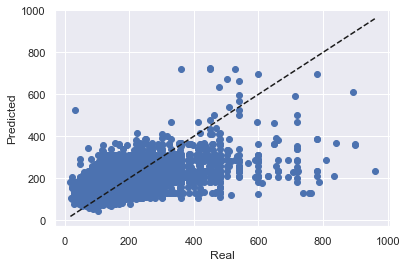

In [19]:
plt.scatter(y_train, predicted)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')

How do we know how good are the models?

#### Regression Metrics (a.k.a. goodness of fit)

**Mean Squared Error(MSE**) is the average of the square between the Original Values and the Predicted Values.It gives an idea of how wrong the predictions were.

$$\Large MSE = \frac{1}{N} \sum\limits_{i = 1}^{N} ( {y_i - \hat{y_i}} )^2$$

$$ MSE = Average(Actual\ target\ value - Predicted\ target\ value)^2$$

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
predicted

array([157.1430237 , 234.79986888, 182.48648834, ..., 132.50338571,
       206.1562409 , 258.49669689])

In [22]:
mse = mean_squared_error(y_test, predicted[:6232])

The squared root will give a better perspective

In [24]:
from math import sqrt
print(sqrt(mse))

103.7636929171466


In [25]:
df.price.mean()

164.8257194821868

### R Squared

The $R^2$ (or R Squared) metric provides an indication of how well the model captures the variance in the data. It ranges between 0 and 1 for no-variance explained to complete variance captured respectively.

$$(Residual\ Square\ sum)\ RSS = \sum\limits_{i = 1}^{N} (Actual\ target\ value - Predicted\ target\ value)$$

$$(Total\ Square\ sum)\ TSS = \sum\limits_{i = 1}^{N} (Actual\ target\ value - Mean\ target\ value)$$

$$\Large R^2 = \Large (1 - \frac{RSS}{TSS})$$

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score = r2_score(y_test, predicted[:6232])

In [28]:
print(r2_score)

-0.3721109791284962


The closest to one the better otherwise isn't explaining the variance of the errors.

### Score distribution

In [29]:
model_scores = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_predict))
    model_scores.append(rmse)

In [30]:
#model_scores

<AxesSubplot:title={'center':'Evaluation Score Distribution'}, ylabel='Density'>

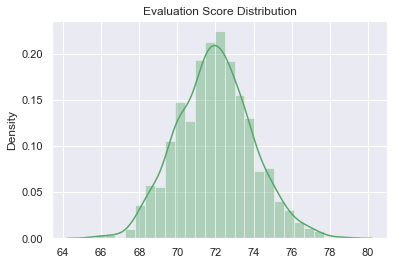

In [31]:
plt.title('Evaluation Score Distribution')
sns.distplot(model_scores, color="g")

#### Model Grid Search

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [38]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN3', KNeighborsRegressor(n_neighbors=3)))
models.append(('KNN5', KNeighborsRegressor(n_neighbors=5)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)))
models.append(('SVRL', SVR(kernel='linear', C=100, gamma='auto')))

In [40]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') #mean_absolute_error
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.349586 (0.022305)
KNN3: 0.190472 (0.033698)
KNN5: 0.255521 (0.020566)
DTR: 0.224594 (0.031148)
SVR: 0.311670 (0.030308)
SVRL: 0.321822 (0.023173)


[Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

Text(0, 0.5, 'R2 Score')

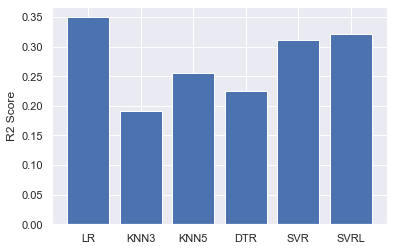

In [41]:
plt.bar(list(range(len(results))), [i.mean() for i in results])
plt.xticks(list(range(len(results))), names)
plt.ylabel('R2 Score')

Let's supposed that the model is ready to go, the we save it.

In [42]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/Users/pedrohserrano/opt/anaconda3/lib/python3.9/site-packages/sklearn/externals/__init__.py)

In [ ]:
filename = 'model_fitted.sav'
joblib.dump(model, filename)

Read again

In [ ]:
loaded_model = joblib.load(filename)

In [ ]:
loaded_model.predict([[12]])